### Data Science and Analytics Intern

### TASK-1 : Prediction using Supervised ML

###### This task in based on the predicition of the percentage of a student given the number of hours of study.The given data has two variables the number of hours studied and the scores obtained.

###### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Fetching the dataset from the url

In [32]:
#Giving the url where the data exists to the url and then reading the file
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data has been imported")

Data has been imported


### Exploring the data

In [33]:
#Number to rows and columns are mentioned using the .shape and first 5 rows and the 
#last 5 rows of the dataset is fetched using the .head() and .tail() respectively
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [35]:
#Provides some statistics pertaining to the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
# .info() provides the desciption about the dataset like the datatype,number of values and more
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing the data

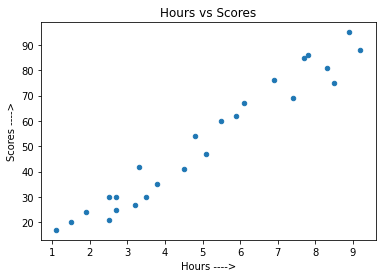

In [37]:
#Plotting the dataset using the scatter plot to find the relationship between the hours studied to the score obtained
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours vs Scores')
plt.xlabel("Hours ---->")
plt.ylabel("Scores ---->")
plt.show()

###### From the graph we can see that there is a positive linear relationship between the 'hours' studied and the 'score' obtained. So, we can use the linear regression supervised ML model to predict the values.

In [38]:
#.corr() is used to find the correlation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Modelling the data

In [39]:
#Dividing the data into attributes and values
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

##### The data is now divided into attributes and values , so we can split this data into training and training sets.This can be achieved by using Scikit-Learn's built-in train_test_split() method:

In [40]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [41]:
#As the data is now split we can train the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the regression line

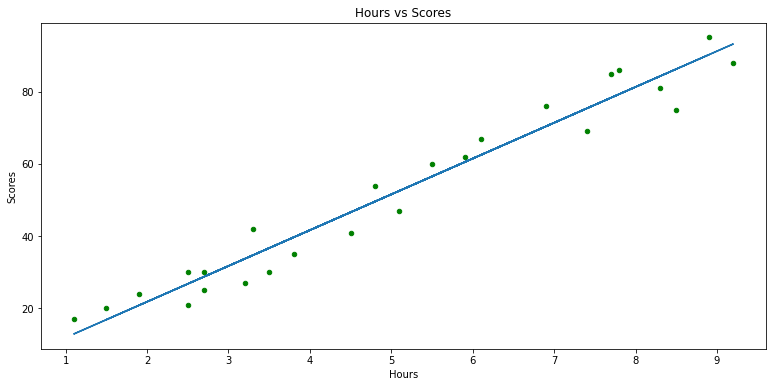

In [42]:
data.plot(kind="scatter",x='Hours',y='Scores',color='g',figsize=(13,6))
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X, regressor.coef_*X+regressor.intercept_)
plt.show()

###### The blue line represents the best fit for the data

## Evaluating the model

#### This is done to check the accuracy of the predictions and can be done using mean absolute error and r2 or any other metric

In [43]:
# Mean absolute error is a measure of errors between paired observations expressing the same phenomenon. 
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, regressor.predict(X_test))) 

Mean Absolute Error: 4.183859899002975


## Predicting the score for asked number of hours

In [47]:
hours = 9.25
score_prediction = regressor.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(score_prediction[0]))

No of hours = 9.25
Predicted Score = 93.69173248737535
